# Jane Chinwuko
# Batch number: DS2307

## This is a binary classification problem(predicting either a customer earn <=50K or >50K)

### Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

### Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:
1.	A single cell estimate of the population 16+ for each state.
2.	Controls for Hispanic Origin by age and sex.
3.	Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

#### Independent Variables:
##### 1.) Age: Represents an individual’s age.
##### 2.) Workclass: Represents an individual’s employment status.
##### 3.) Fnlwgt: Represents the final weight. This is the number of people the census believes the entry represents.
##### 4.) Education: Represents an individual’s highest level of education.
##### 5.) Education_num: Represents an individual’s highest level of education achieved in numerical form.
##### 6.) Marital_status: Represents an individual’s civil status in relation to a significant other.
##### 7.) Occupation: Represents an individual’s general occupation.
##### 8.) Relationship: Represents an individual’s relation to others in a family unit.
##### 9.) Race: Represents an individual’s shared physical or general region of origin
##### 10.) Sex: Represents an individual’s gender.
##### 11.) Capital_gain: Represents an individual’s profit from the sale of property or an investment.
##### 12.) Capital_loss: Represents an individual’s loss from the sale of property or an investment.
##### 13.) Hour_per_week: Represents an individual’s hours worked per week.
##### 14.) Native_country: Represents an individual’s country of origin.

#### Target Variable:
##### 15.) Income: The amount of money an individual generates within a year.

In [1]:
# Imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

C:\Users\Omen\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loaded the dataset to a Pandas DataFrame
income_predict = pd.read_csv('census_income.csv')

## Exploratory Data Analysis

In [3]:
# Viewing the dimensions of the array
income_predict.shape

(32560, 15)

This dataset contains 32560 rows and 15 columns (made up of the independent and target variables)

In [4]:
#Viewing the first 10 rows of the dataset
income_predict.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


We have both categorical and numerical variables in our dataset.

In [5]:
#Viewing the last 20 rows of the dataset
income_predict.tail(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32541,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32542,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32543,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32544,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32545,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32546,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32547,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32548,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32549,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [6]:
#Viewing the columns present in the dataset
columns = income_predict.columns
columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
#Displays the basic information about the columns in the dataset
income_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The datatypes present in our dataset are int64(6 variables) and object(9 variables). We can see that the counts tallies with our number of rows, so no missing values in our data.

In [8]:
#Generating the descriptive statistics of all the features in the dataset
income_predict.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The mean value for the Capital_gain column is higher than the median value showing the presence of outliers. We can see that the values of 25%, 50% and 75% of the columns Capital_gain and Capital_loss are zero. We can drop the columns as there are no meaningful data present in the columns.

In [9]:
#displaying the descriptive statistics of our categorical variables
income_predict.describe(exclude=['float64','int64'])

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [10]:
# viewing the counts of all columns in our dataset
def columns_values(new_df):
    for i in new_df.columns:
        print(new_df[i].value_counts())
        print('\n')
        
columns_values(income_predict)

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

We have some columns having '?' values.

In [11]:
#viewing the number of '?' in our data
income_predict.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [12]:
#Replacing the '?' with NaN
income_predict.replace(' ?', np.NaN, inplace=True)

In [13]:
# After replacing, Now cross checking the naN count in all columns.
income_predict.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [14]:
#Returns the count of unique occurrences in the education column.
income_predict['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

Individuals in the HS-grad education are more.

In [15]:
#Remove the colunms not required from our data
income_predict = income_predict.drop(['Fnlwgt','Education_num','Capital_gain','Capital_loss'], axis=1)

We are dropping these columns because they are not required for our predictions. Since the Education_num column and Education column both conveys same information, we dropped the Education_num.

In [16]:
# Viewing the dimensions of the array
income_predict.shape

(32560, 11)

We now have 11 columns after dropping the columns

In [17]:
#Returns the count of unique occurrences in the age column.
income_predict['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [18]:
##Returns the count of unique occurrences in the sex column.
income_predict['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

The total number of males are 21789. While the number of females are 10771.

In [19]:
#Returns the count of unique occurrences in the workclass column.
income_predict['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Most of the individuals are from the Private workclass.

In [20]:
#Returns the count of unique occurrences in the race column.
income_predict['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

Most of the individuals are from the White race.

In [21]:
#Returns the count of unique occurrences in the marital-status column.
income_predict['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

Most of the individuals' marital status is Married-civ-spouse. We also have many individuals that never married.

In [22]:
#count individuals Hours_per_week per Income
income_predict['Hours_per_week'].groupby([income_predict['Income']]).value_counts()

Income  Hours_per_week
 <=50K  40                11969
        50                 1543
        20                 1146
        45                 1139
        35                 1102
                          ...  
 >50K   73                    1
        89                    1
        95                    1
        96                    1
        97                    1
Name: Hours_per_week, Length: 173, dtype: int64

Most of the individuals earning <=50k work 40 hours per week. While those earning >50k work more than 40 hours per week

In [23]:
#Average age of each gender
income_predict['Age'].groupby([income_predict['Sex']]).mean()

Sex
 Female    36.858230
 Male      39.433567
Name: Age, dtype: float64

The average age for Female is 36.9 while the average for Male is 39.4

In [24]:
# Display maximum age across each Races
income_predict['Age'].groupby([income_predict['Race']]).max()

Race
 Amer-Indian-Eskimo    82
 Asian-Pac-Islander    90
 Black                 90
 Other                 77
 White                 90
Name: Age, dtype: int64

This shows the maximum age of the individuals in each race

In [25]:
#Displays the count of different education in the dataset
income_predict['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

Most of the individuals had HS-grad education

In [26]:
#Returns the count of unique occurrences in the Income column.
income_predict['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

24719 of the individuals earned <=50k while 7841 individuals earned >50k. Our Income column which is our target variable is not balance.

In [27]:
#Returns the count of unique occurrences in the native-country column.
income_predict['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

From the count above, we can see that Mexico is the highest migrants into the United States probably because United States and Mexico share land borders.

In [28]:
#Minimum age by sex
income_predict['Age'].groupby([income_predict['Sex']]).min()

Sex
 Female    17
 Male      17
Name: Age, dtype: int64

In [29]:
#Minimum age by sex
income_predict['Age'].groupby([income_predict['Sex']]).max()

Sex
 Female    90
 Male      90
Name: Age, dtype: int64

From the output of minimum and maximum age by sex below, we can see that the minimum and maximum age values grouped by sex have same values (i.e, Minimum is 17 for both male and female, maximum is 90 for both male and female). This means that the youngest in the dataset for both male and female is 17years old and the oldest for both male and female is 90 years.

In [30]:
#Mean income by age
income_predict['Age'].groupby([income_predict['Income']]).median()

Income
 <=50K    34.0
 >50K     44.0
Name: Age, dtype: float64

Individuals earning <=50k have a median age of 34, while those earning >50k have a median age of 44.

In [31]:
#Average age of male and female across education
income_predict['Age'].groupby([income_predict['Sex'],income_predict['Education']]).mean()

Sex      Education    
 Female   10th            35.447458
          11th            30.546296
          12th            29.756944
          1st-4th         48.521739
          5th-6th         44.369048
          7th-8th         49.693750
          9th             42.131944
          Assoc-acdm      36.361045
          Assoc-voc       37.872000
          Bachelors       35.635578
          Doctorate       45.325581
          HS-grad         38.678171
          Masters         43.074627
          Preschool       41.750000
          Prof-school     40.195652
          Some-college    33.740556
 Male     10th            38.346395
          11th            33.407806
          12th            33.117647
          1st-4th         45.245902
          5th-6th         42.385542
          7th-8th         48.034979
          9th             40.643243
          Assoc-acdm      38.046440
          Assoc-voc       38.939909
          Bachelors       40.322088
          Doctorate       48.327217
     

We can see above the mean age of the individual across the different educational sectors based on gender.

## Data Visualization

<AxesSubplot:>

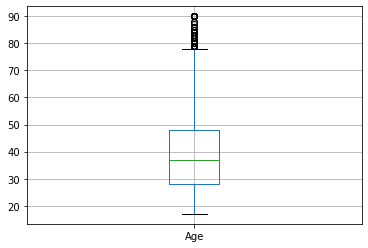

In [32]:
#Visualising the column-age using boxplot
income_predict.boxplot(column='Age')

<AxesSubplot:>

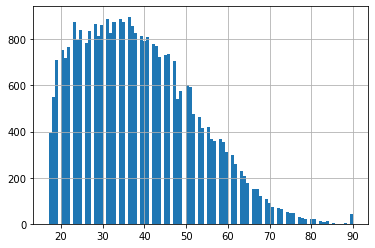

In [33]:
#Visualising the column-age using histogram
income_predict['Age'].hist(bins=100)

The histgram above shows that the majority of the individuals are within the 20–40 age range. The data distribution for age is skewed to the right.

<AxesSubplot:>

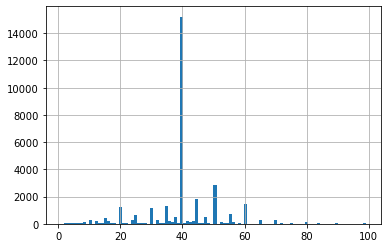

In [34]:
#Visualising the column-Hours_per_week using histogram
income_predict['Hours_per_week'].hist(bins=100)

Most of the individuals worked 40 hours per week.

<function matplotlib.pyplot.show(close=None, block=None)>

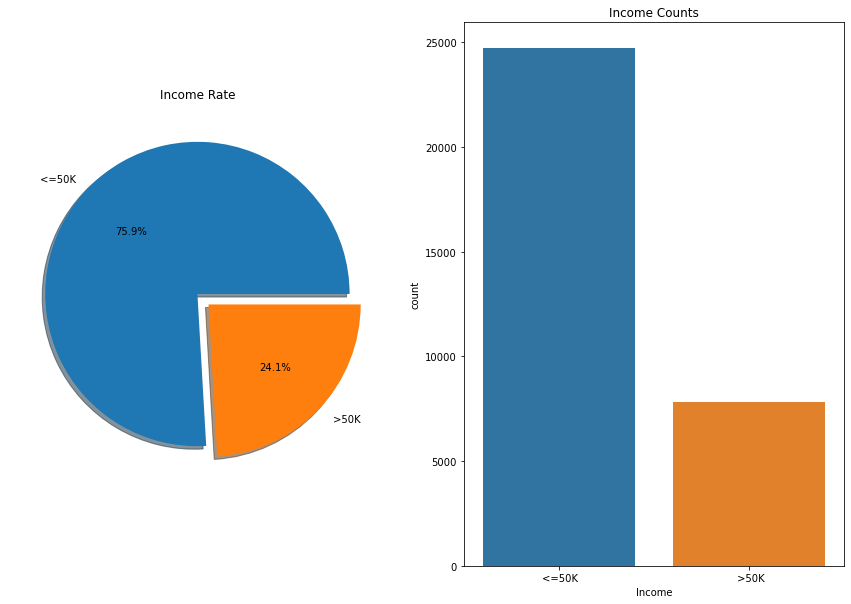

In [35]:
# This pieplot shows the percentage of Income
f, ax = plt.subplots(1,2, figsize = (15,10))
income_predict['Income'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[0], shadow = True)
ax[0].set_title('Income Rate')
ax[0].set_ylabel('')

# This countplot shows the distribution Income
sns.countplot(x ='Income', data = income_predict,  ax = ax[1])
ax[1].set_title('Income Counts')
plt.show

We have two class values >50k and <=50k. The difference in income between those with <=50k and those with >50,000 is evident. The income column is imbalance.

<function matplotlib.pyplot.show(close=None, block=None)>

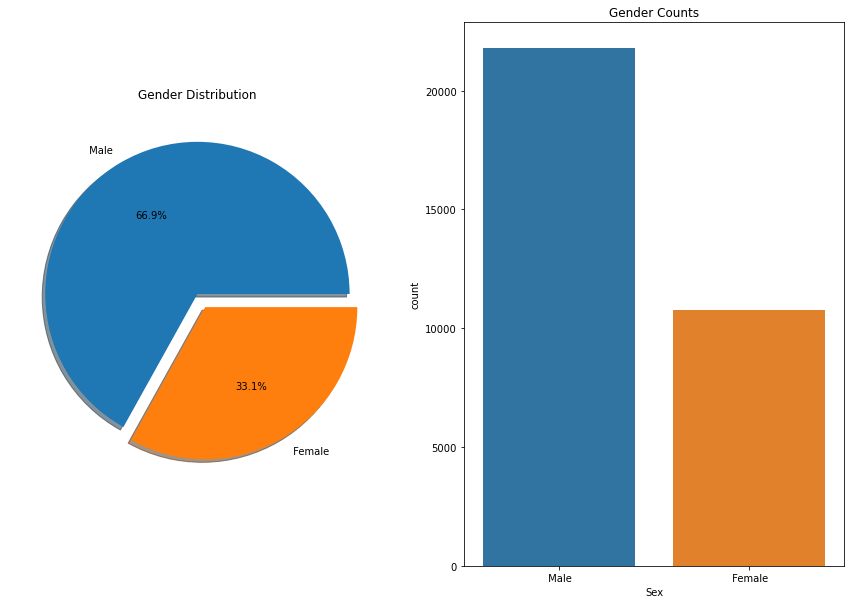

In [36]:
# This pieplot shows the percentage of Sex column
f, ax = plt.subplots(1,2, figsize = (15,10))
income_predict['Sex'].value_counts().plot.pie(explode = [0,0.1], autopct ='%1.1f%%',ax = ax[0], shadow = True)
ax[0].set_title('Gender Distribution')
ax[0].set_ylabel('')

# This countplot shows the distribution of Sex column
sns.countplot(x ='Sex', data = income_predict,  ax = ax[1])
ax[1].set_title('Gender Counts')
plt.show

From the pie chart, we can see that 66.9% were male while 33.1% were female.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

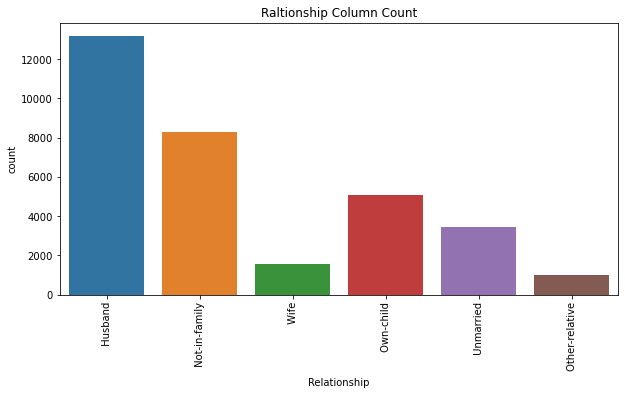

In [37]:
# countplot showing the Relationship of the individuals
plt.figure(figsize=(10,5))
sns.countplot(x='Relationship',data=income_predict)
plt.title('Raltionship Column Count')
plt.xticks(rotation = 90)

The relation, husband appears more.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

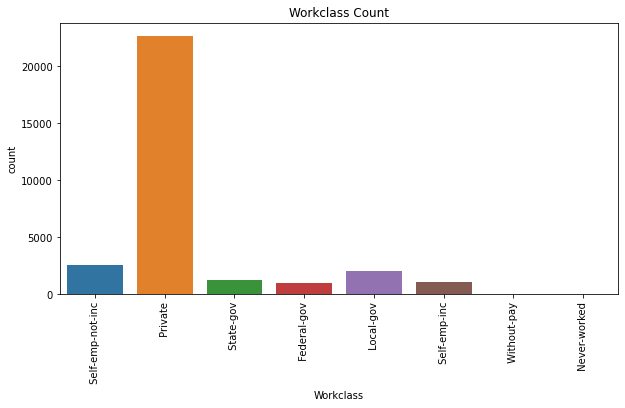

In [38]:
# countplot showing the individuals Workclass
plt.figure(figsize=(10,5))
sns.countplot(x='Workclass',data=income_predict)
plt.title('Workclass Count')
plt.xticks(rotation = 90)

Most individuals were working privately.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

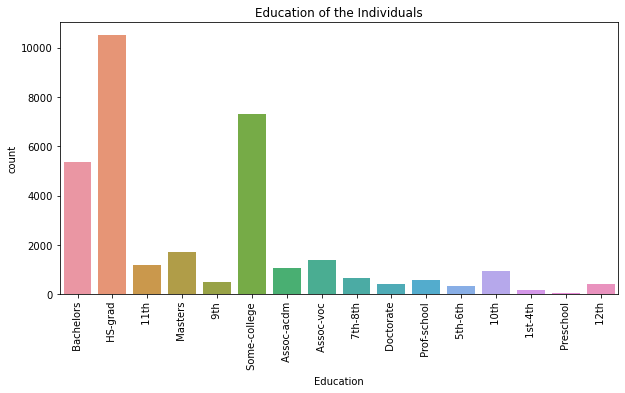

In [39]:
# countplot showing the education of the individuals
plt.figure(figsize=(10,5))
sns.countplot(x='Education',data=income_predict)
plt.title('Education of the Individuals')
plt.xticks(rotation = 90)

Individuals with the HS-grad education are more in number than others. 

Text(0.5, 1.0, 'Box plot representing income and hours-per-week \n')

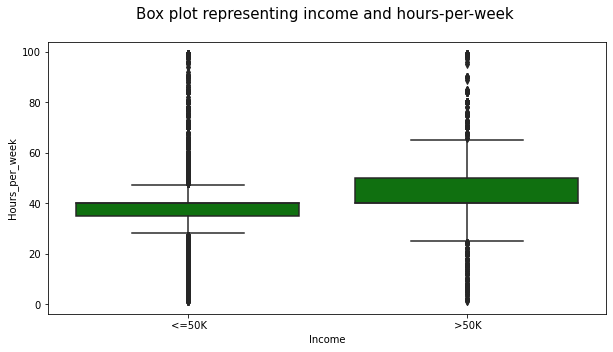

In [40]:
# Box Plotting income vs hours-per-week
plt.figure(figsize=(10,5))
sns.boxplot(x=income_predict['Income'],y=income_predict['Hours_per_week'],color='g')
plt.title("Box plot representing income and hours-per-week \n", size = 15)

Those that earned >50K more more hours than those that earned <=50k

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

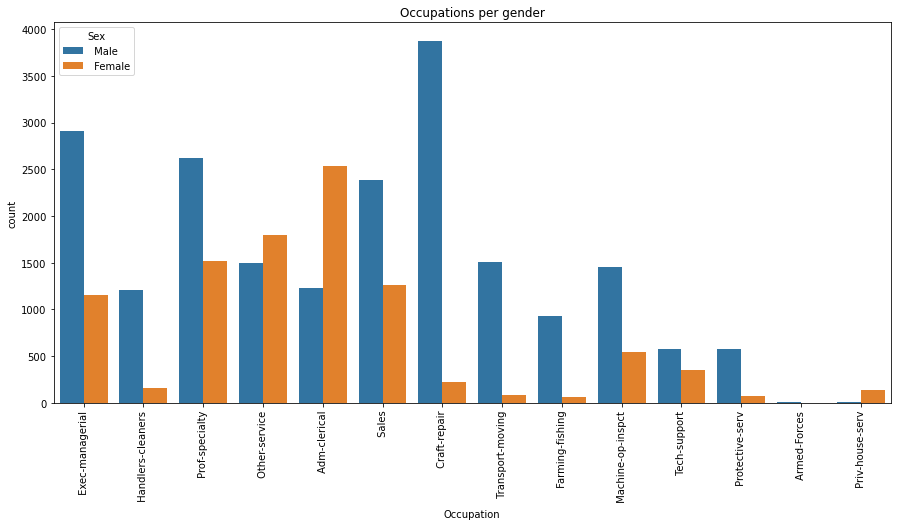

In [41]:
# countplot showing the occupations based on sex
plt.figure(figsize=(15,7))
sns.countplot(x='Occupation', hue='Sex', data=income_predict)
plt.title('Occupations per gender')
plt.xticks(rotation = 90)

We have more male individuals in the Craft-repair occupation than females. More females are present in the other-services, Priv-house-serv and Adm-clerical occupations than males.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

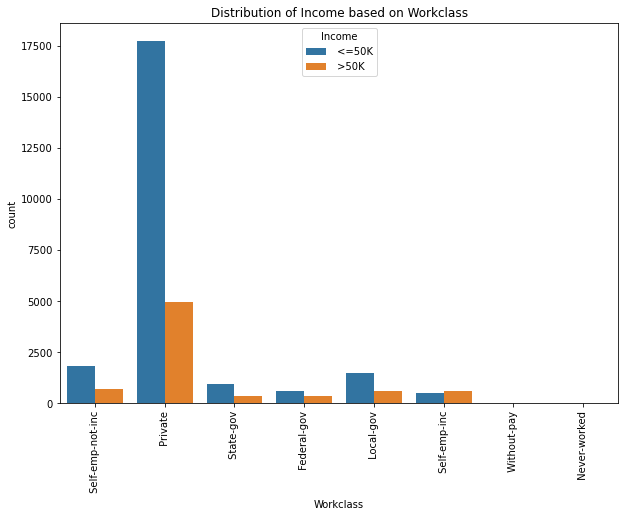

In [42]:
# countplot showing the income based on Workclass
plt.figure(figsize=(10,7))
sns.countplot(x='Workclass', hue='Income', data=income_predict)
plt.title('Distribution of Income based on Workclass')
plt.xticks(rotation = 90)

We can see from the countplot that private have more people of income <=50k than people of >50k. Self-employed have more people with income >50 than those earning <=50k.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

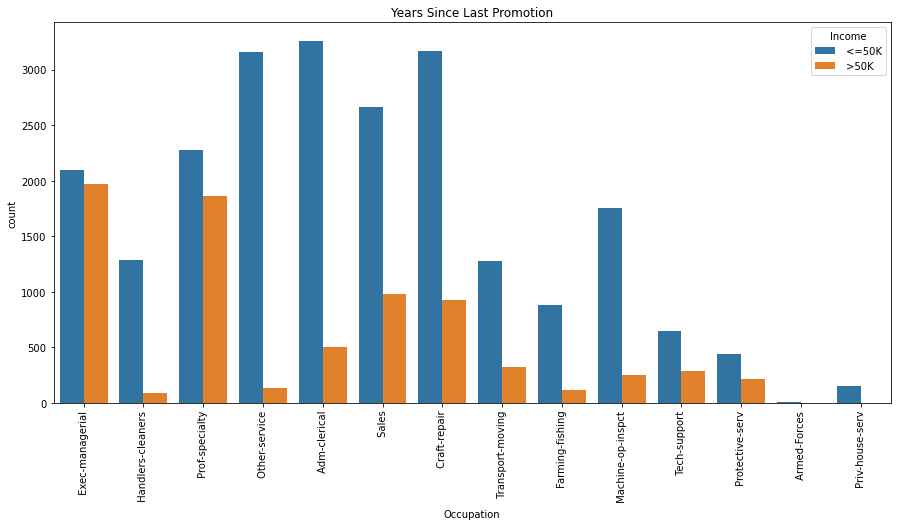

In [43]:
# countplot showing the income based on occupation
plt.figure(figsize=(15,7))
sns.countplot(x='Occupation', hue='Income', data=income_predict)
plt.title('Years Since Last Promotion')
plt.xticks(rotation = 90)

As can be seen from the above comparison countplot, there are three times as many people in most occupations with incomes <50k than there are with incomes >50k.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

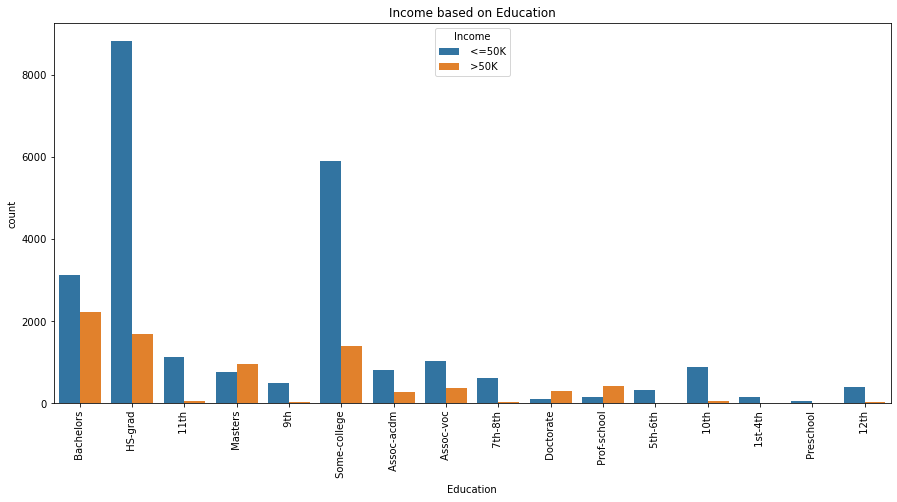

In [44]:
# countplot showing the income based on Education
plt.figure(figsize=(15,7))
sns.countplot(x='Education', hue='Income', data=income_predict)
plt.title('Income based on Education')
plt.xticks(rotation = 90)

More of individuals with Bachelors earn >50k. while more of iIndividuals with HS-grade earn <=50k.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

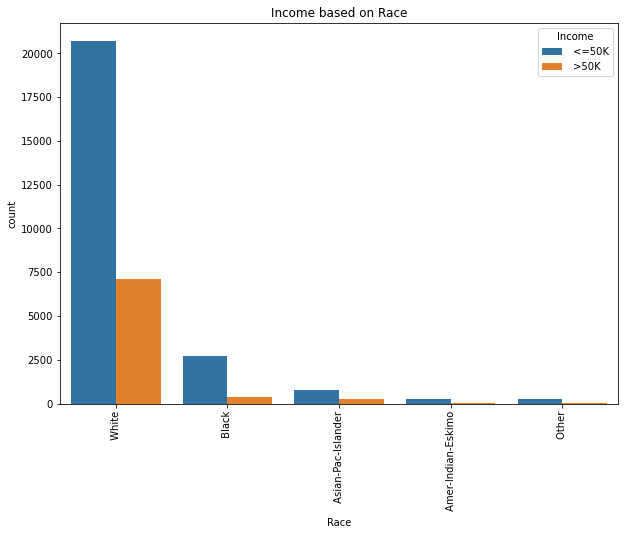

In [45]:
# countplot showing the income based on Race
plt.figure(figsize=(10,7))
sns.countplot(x='Race', hue='Income', data=income_predict)
plt.title('Income based on Race')
plt.xticks(rotation = 90)

We can see that white race has a higher count of incomes >50k 

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

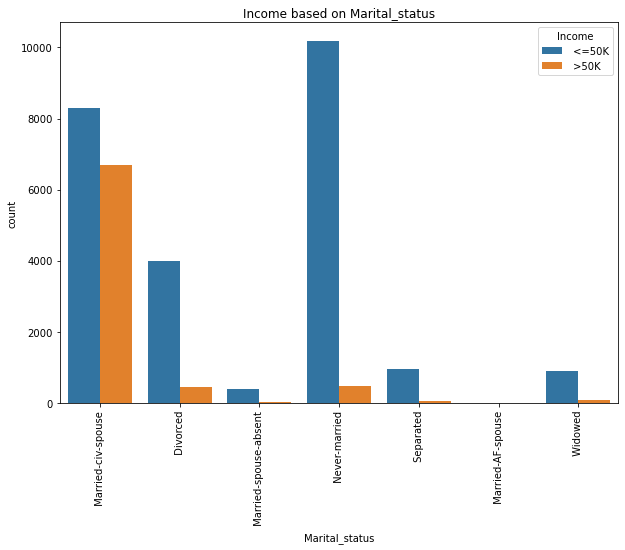

In [46]:
# countplot showing the income based on Marital_status
plt.figure(figsize=(10,7))
sns.countplot(x='Marital_status', hue='Income', data=income_predict)
plt.title('Income based on Marital_status')
plt.xticks(rotation = 90)

Greater number of individuals who never married earned <=50k. Those that earned >50k were married-civ-spouse.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

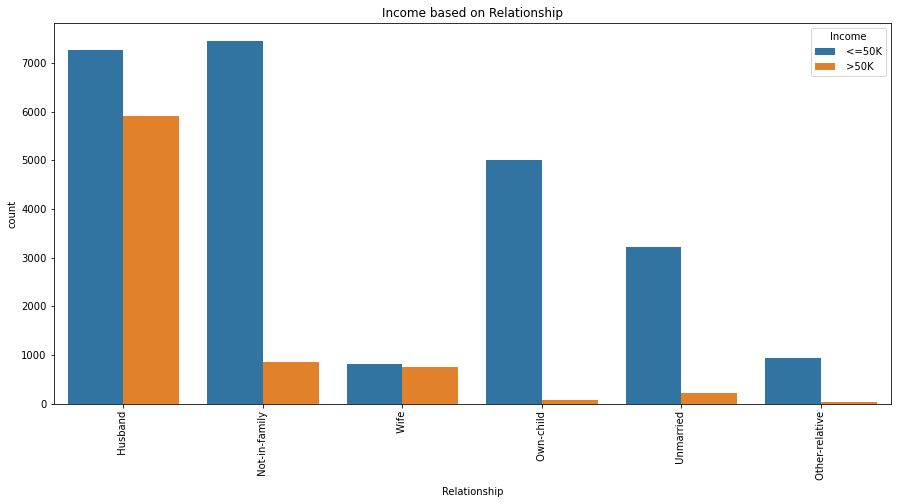

In [47]:
# countplot showing the income based on Relationship
plt.figure(figsize=(15,7))
sns.countplot(x='Relationship', hue='Income', data=income_predict)
plt.title('Income based on Relationship')
plt.xticks(rotation = 90)

Most individuals who have relation as husband have highest count of those earning >50k

## Data Pre-Processing

In [48]:
#Checking for null values in the dataset
missing_values= income_predict.isna().sum()
missing_values

Age                  0
Workclass         1836
Education            0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [49]:
#gets the mode of each column and fill in the missing values
income_predict['Workclass'].fillna(income_predict['Workclass'].mode()[0], inplace = True)
income_predict['Occupation'].fillna(income_predict['Occupation'].mode()[0], inplace = True)
income_predict['Native_country'].fillna(income_predict['Native_country'].mode()[0], inplace = True)

In [50]:
#checking for missing values after fill in the missing values
income_predict.isna().sum()

Age               0
Workclass         0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [51]:
# Printing the total number of duplicates across all the columns
duplicated = income_predict.duplicated()

print("The number of duplicates in the dataset is:", income_predict.duplicated().sum())

The number of duplicates in the dataset is: 4396


In [52]:
#display of the duplicates
income_predict[duplicated]

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
351,33,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
390,27,Private,Bachelors,Never-married,Craft-repair,Not-in-family,White,Male,50,United-States,<=50K
525,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
562,24,Private,HS-grad,Never-married,Handlers-cleaners,Unmarried,Black,Female,40,United-States,<=50K
569,24,Private,HS-grad,Never-married,Craft-repair,Own-child,White,Male,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32502,47,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,<=50K
32511,20,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,White,Male,40,United-States,<=50K
32526,22,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Male,40,United-States,<=50K
32556,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K


In [53]:
#Removing the duplicates
income_predict.drop_duplicates(inplace=True)

In [54]:
#import Label Encoder from sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

#Converted all categorical values to number
#Selects the columns that are not integer
columns = list(income_predict.select_dtypes(exclude=['float64','int64']))
le = LabelEncoder()
for i in columns:
 #print(i)
 income_predict[i] = le.fit_transform(income_predict[i])
income_predict.dtypes

Age               int64
Workclass         int32
Education         int32
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

In [55]:
#Viewing the first 10 rows of the dataset
income_predict.head(10)

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,9,2,3,0,4,1,13,38,0
1,38,3,11,0,5,1,4,1,40,38,0
2,53,3,1,2,5,0,2,1,40,38,0
3,28,3,9,2,9,5,2,0,40,4,0
4,37,3,12,2,3,5,4,0,40,38,0
5,49,3,6,3,7,1,2,0,16,22,0
6,52,5,11,2,3,0,4,1,45,38,1
7,31,3,12,4,9,1,4,0,50,38,1
8,42,3,9,2,3,0,4,1,40,38,1
9,37,3,15,2,3,0,2,1,80,38,1


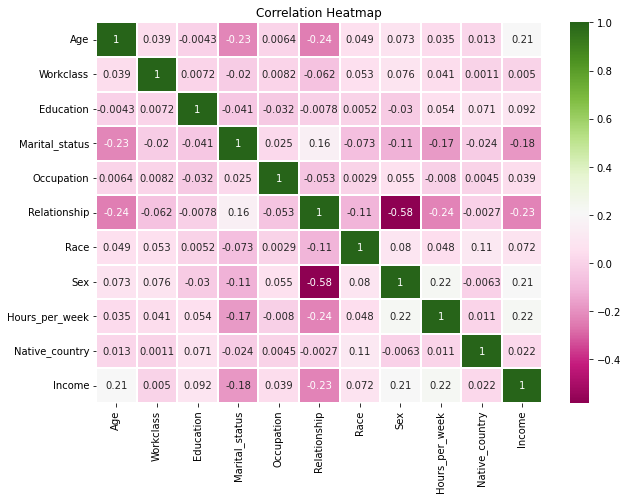

In [56]:
# Using heatmap to visualize the correlation between the numerical features.
plt.figure(figsize=(10,7))
sns.heatmap(income_predict.corr(), annot=True, linewidths = 2, cmap='PiYG')
plt.title('Correlation Heatmap')
plt.show()

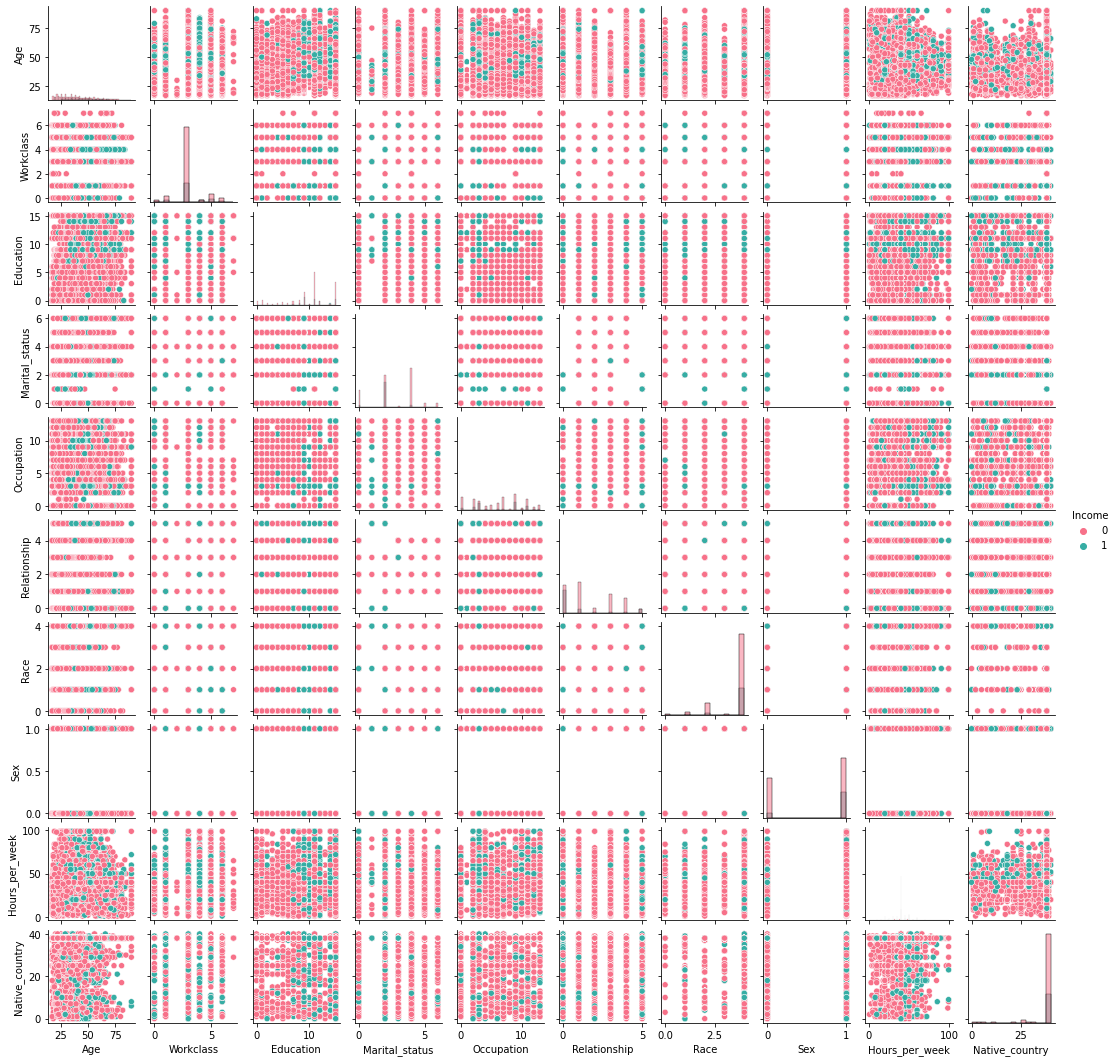

In [57]:
#pairplot showing the distribution of the variables
sns.pairplot(income_predict, diag_kind="hist", hue="Income", height=1.5, palette = 'husl')

From the heatmap and pairplot, we can see that there are no correlation between the independent features and target variable. Meaning that the income an individual will earn is not dependent of any of these features.

In [58]:
# split data into x and y
X = income_predict.drop('Income',axis =1)
y = income_predict['Income']
X

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,50,5,9,2,3,0,4,1,13,38
1,38,3,11,0,5,1,4,1,40,38
2,53,3,1,2,5,0,2,1,40,38
3,28,3,9,2,9,5,2,0,40,4
4,37,3,12,2,3,5,4,0,40,38
...,...,...,...,...,...,...,...,...,...,...
32553,53,3,12,2,3,0,4,1,40,38
32554,22,3,15,4,10,1,4,1,40,38
32555,27,3,7,2,12,5,4,0,38,38
32557,58,3,11,6,0,4,4,0,40,38


In [59]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.780320,1.618043,-0.300409,-0.386045,-0.815668,-0.921548,0.422704,0.725777,-2.146578,0.281688
1,-0.092210,-0.090800,0.207361,-1.674266,-0.311891,-0.306950,0.422704,0.725777,-0.046669,0.281688
2,0.998452,-0.090800,-2.331487,-0.386045,-0.311891,-0.921548,-1.809210,0.725777,-0.046669,0.281688
3,-0.819319,-0.090800,-0.300409,-0.386045,0.695662,2.151443,-1.809210,-1.377834,-0.046669,-4.974005
4,-0.164921,-0.090800,0.461246,-0.386045,-0.815668,2.151443,0.422704,-1.377834,-0.046669,0.281688
...,...,...,...,...,...,...,...,...,...,...
28159,0.998452,-0.090800,0.461246,-0.386045,-0.815668,-0.921548,0.422704,0.725777,-0.046669,0.281688
28160,-1.255584,-0.090800,1.222900,0.902175,0.947551,-0.306950,0.422704,0.725777,-0.046669,0.281688
28161,-0.892030,-0.090800,-0.808178,-0.386045,1.451327,2.151443,0.422704,-1.377834,-0.202218,0.281688
28162,1.362006,-0.090800,0.207361,2.190395,-1.571333,1.536845,0.422704,-1.377834,-0.046669,0.281688


### Feature Importance

Feature Importances :  [0.04279877 0.03330354 0.09730634 0.14204216 0.0494512  0.4940104
 0.02508226 0.04976402 0.04579891 0.02044246]


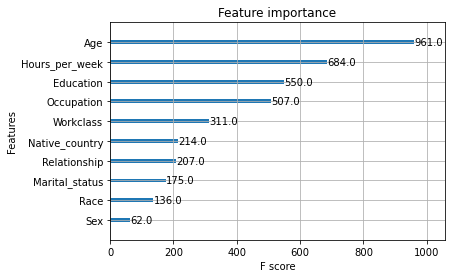

In [60]:
#import the neccessary libraries
from xgboost import XGBClassifier
from xgboost import plot_importance

# feature importance using xgboost classifier
model_xgb = XGBClassifier(random_state = 0 )
model_xgb.fit(x, y)

print("Feature Importances : ", model_xgb.feature_importances_)

# plot feature importance
plot_importance(model_xgb)
plt.show()

From the feature importance, we can see the importance of each features to our model. A feature will have a greater impact on the model used to forecast a certain variable if it has a higher score. We can say that the age of the individual and the number of hours worked per work affects the income earned.

In [61]:
from imblearn.over_sampling import SMOTE
#Used oversampling to handling imbalance in the Type of Glass column
term_sm = SMOTE()
X_res, y_res = term_sm.fit_resample(x, y)
y_res.value_counts()

0    21481
1    21481
Name: Income, dtype: int64

Our target variable is now balance.

# Model Building

In [62]:
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.20, random_state = 42)

# Viewing the dimensions of our training and testing data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((34369, 10), (8593, 10), (34369,), (8593,))

We splitted our data in X_train, X_test, y_train and y_test. We shall be using the train variables for the purpose of training our model while the test variables will be used to validate the performance of our model. 80% of our data will be used to train the model while 20% will be used for model validation.

## 1. Random Forest

In [63]:
# Create a Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy for Random Forest is: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Random Forest is: 0.86


[[3721  641]
 [ 539 3692]]


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4362
           1       0.85      0.87      0.86      4231

    accuracy                           0.86      8593
   macro avg       0.86      0.86      0.86      8593
weighted avg       0.86      0.86      0.86      8593



### Cross Validation Score for Random Forest

In [64]:
results = []
scores = cross_val_score(rf, X_train, y_train,cv=5)  # You can choose a different scoring metric
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Random Forest',accuracy, mean_score, diff])

Cross-validation scores: [0.85437882 0.85772476 0.85583358 0.85423334 0.85697658]
Mean accuracy: 0.86


The difference between the accuracy score and the cross validation score is: 0.006849510200046094


## 2. Xgboost Classifier

In [65]:
# Create a Xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"The Accuracy for Xgboost Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_xgb)
print(confusion_matrix(y_test, y_pred_xgb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Xgboost Classifier is:  0.87699290119865


[[3756  606]
 [ 451 3780]]


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      4362
           1       0.86      0.89      0.88      4231

    accuracy                           0.88      8593
   macro avg       0.88      0.88      0.88      8593
weighted avg       0.88      0.88      0.88      8593



### Cross Validation Score for Xgboost Classifier

In [66]:

scores = cross_val_score(xgb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Xgboost Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.8718359  0.8754728  0.87009019 0.87503637 0.87399971]
Mean accuracy: 0.87


The difference between the accuracy score and the cross validation score is: 0.0037059067351933317


## 3. Adaboost classifier

In [67]:
# Create a Adaboost Classifier
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

y_pred_ab = ab.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_ab)
print(f"The Accuracy for Adaboost classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_ab)
print(confusion_matrix(y_test, y_pred_ab))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Adaboost classifier is:  0.833352728965437


[[3489  873]
 [ 559 3672]]


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      4362
           1       0.81      0.87      0.84      4231

    accuracy                           0.83      8593
   macro avg       0.83      0.83      0.83      8593
weighted avg       0.84      0.83      0.83      8593



### Cross Validation Score for Adaboost classifier

In [68]:
scores = cross_val_score(ab, X_train, y_train,cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Adaboost classifier',accuracy, mean_score, diff])

Cross-validation scores: [0.83037533 0.8347396  0.82615653 0.83648531 0.83500655]
Mean accuracy: 0.83


The difference between the accuracy score and the cross validation score is: 0.0008000665695290232


## 4. Gradient Boosting Classifier

In [69]:
# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print(f"The Accuracy for Gradient Boosting Classifier is: ",accuracy)
print('\n')

# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_gb)
print(confusion_matrix(y_test, y_pred_gb))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Gradient Boosting Classifier is:  0.8497614337251251


[[3543  819]
 [ 472 3759]]


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      4362
           1       0.82      0.89      0.85      4231

    accuracy                           0.85      8593
   macro avg       0.85      0.85      0.85      8593
weighted avg       0.85      0.85      0.85      8593



### Cross Validation Score for Gradient Boosting Classifier

In [70]:

scores = cross_val_score(gb, X_train, y_train, cv=5) 
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")

print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Gradient Boosting Classifier', accuracy, mean_score, diff])

Cross-validation scores: [0.84986907 0.85059645 0.84157696 0.84885074 0.84984723]
Mean accuracy: 0.85


The difference between the accuracy score and the cross validation score is: 0.0016133439017824713


## 5. Decision Tree

In [71]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print(f"The Accuracy for Decision Tree: {accuracy:.2f}")
print('\n')
# Display a classification report for more detailed metrics
report = classification_report(y_test, y_pred_dt)
print(confusion_matrix(y_test, y_pred_dt))
print('\n')
print("Classification Report:")
print(report)

The Accuracy for Decision Tree: 0.82


[[3596  766]
 [ 786 3445]]


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      4362
           1       0.82      0.81      0.82      4231

    accuracy                           0.82      8593
   macro avg       0.82      0.82      0.82      8593
weighted avg       0.82      0.82      0.82      8593



### Cross Validation Score for Decision Tree

In [72]:

scores = cross_val_score(dt, X_train, y_train,cv=5)
print("Cross-validation scores:", scores)

# Calculate and print the mean of the scores
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score:.2f}")
print('\n')
print(f'The difference between the accuracy score and the cross validation score is: {accuracy- mean_score}')


diff = accuracy - mean_score
results.append(['Decision Tree',accuracy, mean_score, diff])

Cross-validation scores: [0.81088158 0.80869945 0.80782659 0.80520803 0.81318202]
Mean accuracy: 0.81


The difference between the accuracy score and the cross validation score is: 0.010228339896296568


In [73]:
# create dataframe for all the accuracy scores and cross validation score for the models used
df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy Score','Cross Validation Score', 'Difference btw accuracy and Cross Validtion Score'])
df

,Algorithm,Accuracy Score,Cross Validation Score,Difference btw accuracy and Cross Validtion Score
0,Random Forest,0.862679,0.855829,0.006850
1,Xgboost Classifier,0.876993,0.873287,0.003706
2,Adaboost classifier,0.833353,0.832553,0.000800
3,Gradient Boosting Classifier,0.849761,0.848148,0.001613
4,Decision Tree,0.819388,0.809160,0.010228


#### Selection of the best model

In [74]:
#Selection of the best model based on the difference between the accuracy and cross validation score
least_value = min(df['Difference btw accuracy and Cross Validtion Score'].tolist())
best_model = df.loc[(df['Difference btw accuracy and Cross Validtion Score']) == least_value, 'Algorithm']
best_model = ' '.join(str(best_model).split()[1:-4])
print('From the table above, my best model is the', best_model)

From the table above, my best model is the Adaboost classifier


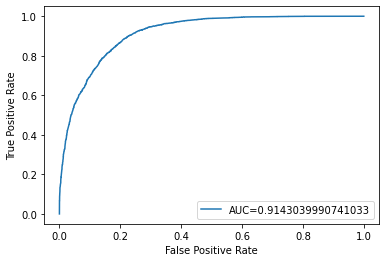

In [75]:
#ROC plot of the best model
import sklearn.metrics as metrics
#define metrics
y_pred_ab = ab.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_ab)
auc = metrics.roc_auc_score(y_test, y_pred_ab)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

From the ROC curve above, we can see that the AUC value for our best model is 91.4%

In [76]:
#Search for the best hyperparameter for model tuning RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

model_best = AdaBoostClassifier()

model_param = {"base_estimator":[None],
    "random_state":[0],
    "learning_rate":[0.01,0.001, 0.1, 1.0],
    "n_estimators":[10, 50, 100, 500]
    }

In [77]:
from sklearn.model_selection import RandomizedSearchCV
gd_search = RandomizedSearchCV(model_best, model_param, cv = 5)

gd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'base_estimator': [None],
                                        'learning_rate': [0.01, 0.001, 0.1,
                                                          1.0],
                                        'n_estimators': [10, 50, 100, 500],
                                        'random_state': [0]})

In [78]:
#display the best parameters from the search

print("The best base_estimator is : " + str(gd_search.best_params_["base_estimator"]),
     "\nThe best random_state: " + str(gd_search.best_params_["random_state"]),
     "\nThe best learning_rate: " + str(gd_search.best_params_["learning_rate"]),
     "\nThe best n_estimators: " + str(gd_search.best_params_["n_estimators"]))

The best base_estimator is : None 
The best random_state: 0 
The best learning_rate: 1.0 
The best n_estimators: 100


In [79]:
# train the model with the selected parameters
loan_model = AdaBoostClassifier(base_estimator =None, random_state  = 0, learning_rate =1.0, n_estimators = 100)
loan_model.fit(X_train, y_train)
y_pred = loan_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8402187827301292

In [80]:
import pickle
# save the model to disk
filename = 'income_prediction.sav'
pickle.dump(loan_model, open(filename, 'wb'))

In [81]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
accuracy_dataframe = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
accuracy_dataframe

,Actual,Predicted
20218,0,0
7886,0,1
7685,0,0
7487,0,0
25213,1,1
...,...,...
22385,0,0
35467,1,1
10755,0,0
20680,0,1


In [82]:
#This will revert the encoding done for the primary_fuel column
accuracy_dataframe['Actual']= le.inverse_transform(accuracy_dataframe['Actual'])
accuracy_dataframe['Predicted']= le.inverse_transform(accuracy_dataframe['Predicted'])
accuracy_dataframe

,Actual,Predicted
20218,<=50K,<=50K
7886,<=50K,>50K
7685,<=50K,<=50K
7487,<=50K,<=50K
25213,>50K,>50K
...,...,...
22385,<=50K,<=50K
35467,>50K,>50K
10755,<=50K,<=50K
20680,<=50K,>50K


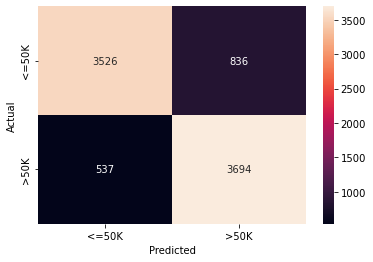

In [83]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
label=['<=50K', '>50K']
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=label, yticklabels=label,)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Conclusion

This is a binary classification problem because the target variable is classified into two categories (<=50K or >50K). We used the Census Income dataset to analyse whether a person makes over $50K a year based on the features provided. The dataset is made up 32560 rows and 15 columns. Of these columns, we have 14 independent variables and 1 target variable(Income). We visualized the relationships between some features.

Some of the observations recorded are:

#### 1) 24719 of the individuals earned <=50k while 7841 individuals earned >50k.
#### 2) Most of the individuals earning <=50k work 40 hours per week. While those earning >50k work more than 40 hours per week.
#### 3) Job satisfaction did not have an effect on attrition rate because the highest number of employees had a high job satisfcation.
#### 4) Mexico has the highest migrants into the United States.
We used different algorithms to train our model. 80% of the data was used for taining while 20% was used for validation. The criteria we used in the selection of best model is accuracy and cross validation score. We calculated the difference between these scores and selected the algorithm that had the lowest result. AdaBoost Classifier was selected as our best model because it had a lower difference between accuracy and cross validation score. We tuned our best model with Randomized SearchCV. The accuracy score before tuning was 0.833353 and after training our model with the best selected parameters, the model's accuracy increased slightly to 0.840219. There was an improvement in the accuracy after tuning. Testing the performance of the model, we can see that from the 10 predictions made, the model was able to predict 8 correctly. We can also see from the confusion matrix that the model predicted that 3526 will make <=50K a year and actually they did make <=50K (True Negative). It predicted 3694 will make >50K and they made >50K (True Positive). The model predicted that 537 will make <=50K whereas, they made >50K (False Negative). Predicted 836 will make >50K but they made <=50K(False Positive). We can further improve our model by trying alternate values for the training parameters.
